
📥 Downloading dataset from Google Drive...


Downloading...
From: https://drive.google.com/uc?id=1-L-kJZPSJbrw6ysAZoW_2leYIax6qfob
To: /content/ipl_matches.csv
100%|██████████| 1.29M/1.29M [00:00<00:00, 13.4MB/s]


✅ Dataset loaded successfully!

🔹 First 5 rows of the dataset:
   season       id                                          name short_name  \
0     NaN  1370350          Chennai Super Kings v Gujarat Titans   CSK v GT   
1     NaN  1370351         Lucknow Super Giants v Mumbai Indians   LSG v MI   
2     NaN  1370352                                     TBC v TBC  TBC v TBC   
3     NaN  1370353                                     TBC v TBC  TBC v TBC   
4  2023.0  1359544  Royal Challengers Bangalore v Gujarat Titans   RCB v GT   

                                         description home_team away_team  \
0  Qualifier 1 (N), Indian Premier League at Chen...       CSK        GT   
1  Eliminator (N), Indian Premier League at Chenn...       LSG        MI   
2  Qualifier 2 (N), Indian Premier League at Ahme...       TBA       TBA   
3  Final (N), Indian Premier League at Ahmedabad,...       TBA       TBA   
4  70th Match (N), Indian Premier League at Benga...       RCB        GT   

  tos

<ipython-input-1-674e5ea740cd>:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Unknown", inplace=True)
<ipython-input-1-674e5ea740cd>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wins.index, y=team_wins.values, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


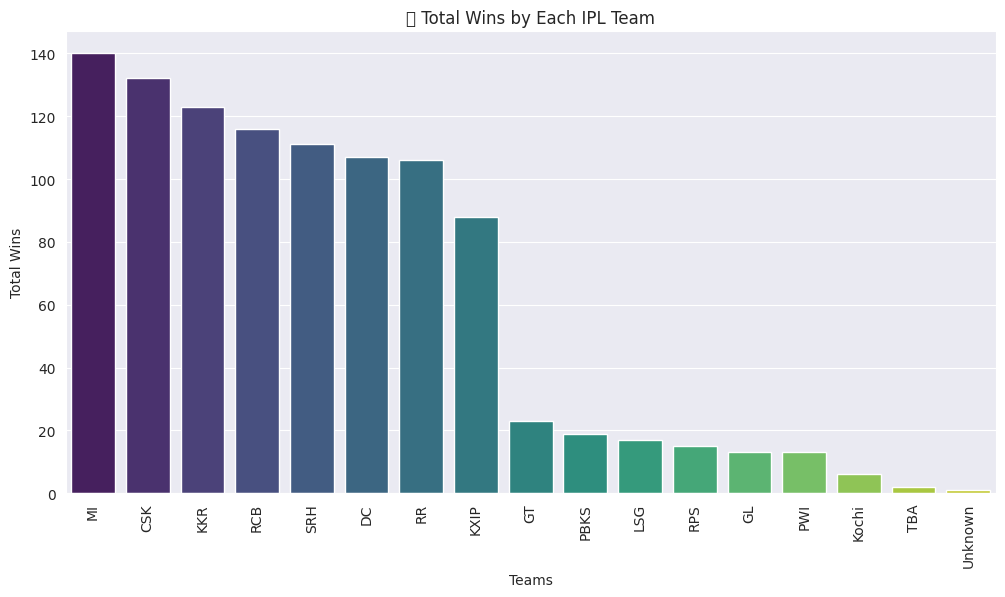


✅ IPL Data Analysis Completed!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown  # Used for downloading files from Google Drive

# Set Plot Style
sns.set_style("darkgrid")

# Google Drive File ID (Extracted from your shared link)
file_id = "1-L-kJZPSJbrw6ysAZoW_2leYIax6qfob"

# Generate Direct Download URL
download_url = f"https://drive.google.com/uc?id={file_id}"

# File Name for the Dataset
csv_filename = "ipl_matches.csv"

# Download the CSV File
print("\n📥 Downloading dataset from Google Drive...")
gdown.download(download_url, csv_filename, quiet=False)

# Load the Dataset
try:
    df = pd.read_csv(csv_filename)
    print("✅ Dataset loaded successfully!")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    exit()

# Display Dataset Overview
print("\n🔹 First 5 rows of the dataset:")
print(df.head())

print("\n🔹 Dataset Information:")
print(df.info())

print("\n🔹 Checking for Missing Values:")
print(df.isnull().sum())

# Data Preprocessing
print("\n📌 Preprocessing Data...")
columns_to_drop = ['umpire1', 'umpire2', 'umpire3']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
df.fillna("Unknown", inplace=True)
print("\n✅ Data Preprocessing Completed!")

# Exploratory Data Analysis (EDA)
print("\n📊 Performing Exploratory Data Analysis...")

# Total Wins Analysis
team_wins = df['winner'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=team_wins.index, y=team_wins.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Total Wins")
plt.title("🏆 Total Wins by Each IPL Team")
plt.show()

# Top Run-Scorers
if 'batsman' in df.columns and 'batsman_runs' in df.columns:
    top_scorers = df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_scorers.values, y=top_scorers.index, palette="coolwarm")
    plt.xlabel("Total Runs")
    plt.ylabel("Player")
    plt.title("🏏 Top 10 Run Scorers in IPL")
    plt.show()

# Top Wicket-Takers
if 'bowler' in df.columns and 'dismissal_kind' in df.columns:
    df_wickets = df[df['dismissal_kind'].notna()]
    top_wicket_takers = df_wickets['bowler'].value_counts().head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_wicket_takers.values, y=top_wicket_takers.index, palette="magma")
    plt.xlabel("Total Wickets")
    plt.ylabel("Bowler")
    plt.title("🎯 Top 10 Wicket-Takers in IPL")
    plt.show()

print("\n✅ IPL Data Analysis Completed!")


# New Section

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the correct file path for the dataset
file_path = r"C:\Users\stud\Downloads\ipl_matches.csv"

# Check if the file exists
if not os.path.exists(file_path):
    print(f"❌ Error: File not found at {file_path}. Please check the file path.")
else:
    try:
        # Load the dataset
        df = pd.read_csv(file_path)
        print("✅ Dataset loaded successfully!")
        print(df.head())

        # ------ Team Performance Analysis ------
        # Counting match wins per team
        team_wins = df['winner'].value_counts()

        # Plotting Team Wins
        plt.figure(figsize=(12, 6))
        sns.barplot(x=team_wins.index, y=team_wins.values, palette="viridis")
        plt.xticks(rotation=90)
        plt.xlabel("Teams")
        plt.ylabel("Total Wins")
        plt.title("Total Wins by Each IPL Team")
        plt.show()

        # ------ Top Run-Scorers ------
        # Grouping by players and summing runs
        if 'batsman' in df.columns and 'batsman_runs' in df.columns:
            top_scorers = df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

            # Plotting Top Run Scorers
            plt.figure(figsize=(10, 5))
            sns.barplot(x=top_scorers.values, y=top_scorers.index, palette="coolwarm")
            plt.xlabel("Total Runs")
            plt.ylabel("Player")
            plt.title("Top 10 Run Scorers in IPL")
            plt.show()
        else:
            print("⚠️ Warning: Required columns for run scorers analysis not found in the dataset.")

        # ------ Wicket-Takers ------
        # Checking if necessary columns exist
        if 'dismissal_kind' in df.columns and 'bowler' in df.columns:
            df_wickets = df[df['dismissal_kind'].notna()]
            top_wicket_takers = df_wickets['bowler'].value_counts().head(10)

            # Plotting Top Wicket-Takers
            plt.figure(figsize=(10, 5))
            sns.barplot(x=top_wicket_takers.values, y=top_wicket_takers.index, palette="magma")
            plt.xlabel("Total Wickets")
            plt.ylabel("Bowler")
            plt.title("Top 10 Wicket-Takers in IPL")
            plt.show()
        else:
            print("⚠️ Warning: Required columns for wicket analysis not found in the dataset.")

        print("✅ IPL Data Analysis Completed!")

    except Exception as e:
        print(f"❌ Error loading dataset: {e}")


❌ Error: File not found at C:\Users\stud\Downloads\ipl_matches.csv. Please check the file path.
